In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def load_gtrends_csv():
    # Correctly parses the date.
    def date_to_pandas_datetime(x): return pd.to_datetime(x, format='%Y-%m-%d')
    df = pd.read_csv('../../datasets/google_trends/gtrends.csv', parse_dates=[
                     'Timestamp'], date_parser=date_to_pandas_datetime, index_col='Timestamp')
    df.sort_index(inplace=True)
    return df

In [16]:
def load_btc_csv(filepath):
    # Función que permite convertir el formato de las fechas como unix time
    # en un objeto de fecha.
    def unix_time_to_date(x): return pd.to_datetime(x, unit='s')
    return pd.read_csv(filepath, parse_dates=['Timestamp'], date_parser=unix_time_to_date, index_col='Timestamp')

In [17]:
def load_alternative_me_csv():
    # Correctly parses the date.
    def date_to_pandas_datetime(x): return pd.to_datetime(x, format='%d-%m-%Y')
    df = pd.read_csv('../../datasets/alternative_me/alternative_me.csv', parse_dates=[
                     'Timestamp'], date_parser=date_to_pandas_datetime, index_col='Timestamp')
    # Convert SentimentClassification into a factor
    df['SentimentClassificationFactor'], _ = pd.factorize(
        df.SentimentClassification)
    # Removes the used column
    df.drop('SentimentClassification', inplace=True, axis=1)
    df.sort_index(inplace=True)
    return df

In [18]:
df = load_btc_csv('../../datasets/processed/btc_features_daily.csv')

In [19]:
gtrends_df = load_gtrends_csv()

In [20]:
alternative_me_df = load_alternative_me_csv()

In [21]:
df = pd.merge_asof(df, gtrends_df, left_index=True,
                   right_index=True, tolerance=pd.Timedelta("11h"))
df[gtrends_df.columns] = df[gtrends_df.columns].interpolate()

df = pd.merge_asof(df, alternative_me_df, left_index=True,
                   right_index=True, tolerance=pd.Timedelta("11h"))

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'rsi_5', 'rsi_10', 'rsi_15', 'rsi_30', 'log_ret', 'autocorr_1',
       'autocorr_3', 'autocorr_5', 'vol_5', 'vol_10', 'vol_15', 'vol_30',
       'bsadf_nt_1', 'bsadf_nt_2', 'bsadf_nt_3', 'bsadf_ct_1', 'bsadf_ct_2',
       'bsadf_ct_3', 'bsadf_ctt_1', 'bsadf_ctt_2', 'bsadf_ctt_3', 'OpenFFD',
       'HighFFD', 'LowFFD', 'CloseFFD', 'Volume_(BTC)FFD',
       'Volume_(Currency)FFD', 'Interest', 'SentimentIndex',
       'SentimentClassificationFactor'],
      dtype='object')

# Google Trends

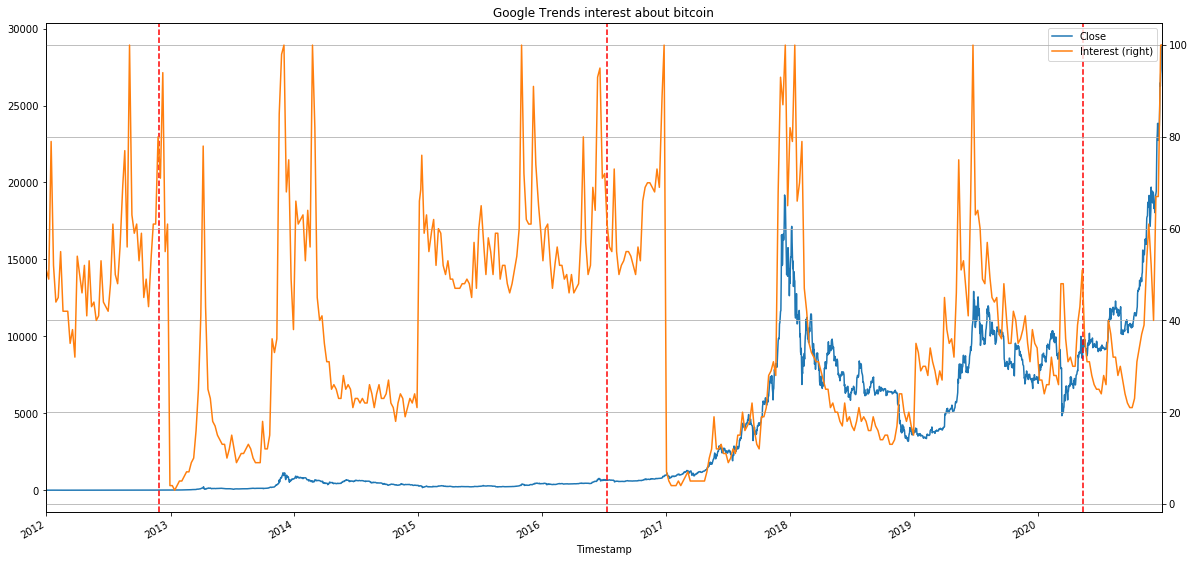

In [23]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
df[['Close', 'Interest']].plot(kind='line', secondary_y='Interest',  ax=ax)
ax.axvline(pd.datetime(year=2012, month=11, day=28), ls='--', color='r')
ax.axvline(pd.datetime(year=2016, month=7, day=9), ls='--', color='r')
ax.axvline(pd.datetime(year=2020, month=5, day=11), ls='--', color='r')
plt.title('Google Trends interest about bitcoin')
plt.xlabel('Timestamp')
plt.grid()
plt.show()

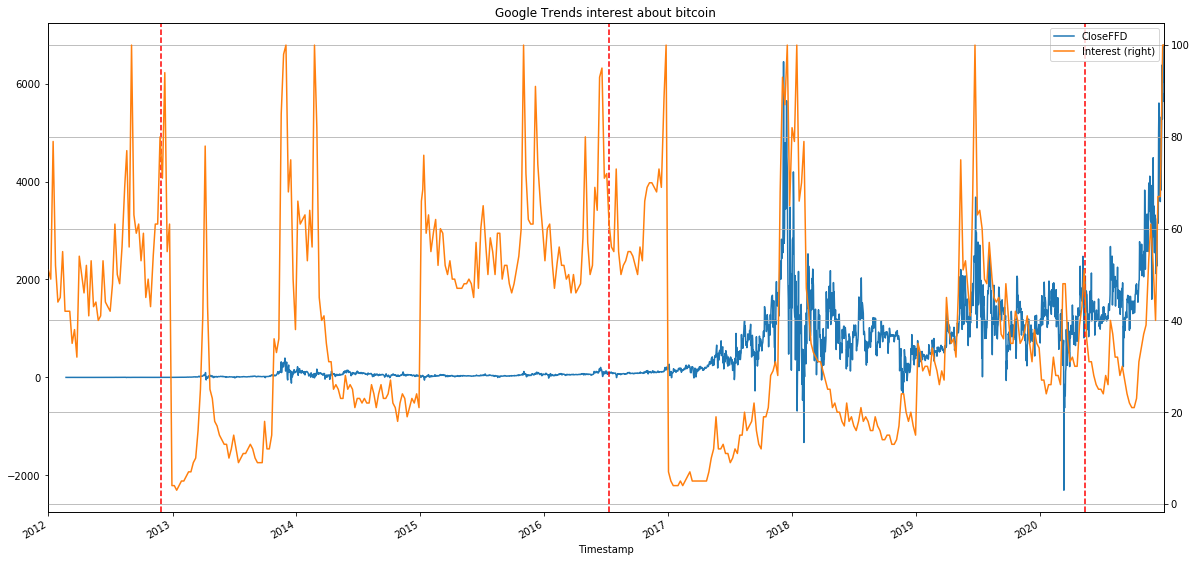

In [24]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
df[['CloseFFD', 'Interest']].plot(kind='line', secondary_y='Interest',  ax=ax)
ax.axvline(pd.datetime(year=2012, month=11, day=28), ls='--', color='r')
ax.axvline(pd.datetime(year=2016, month=7, day=9), ls='--', color='r')
ax.axvline(pd.datetime(year=2020, month=5, day=11), ls='--', color='r')
plt.title('Google Trends interest about bitcoin')
plt.xlabel('Timestamp')
plt.grid()
plt.show()

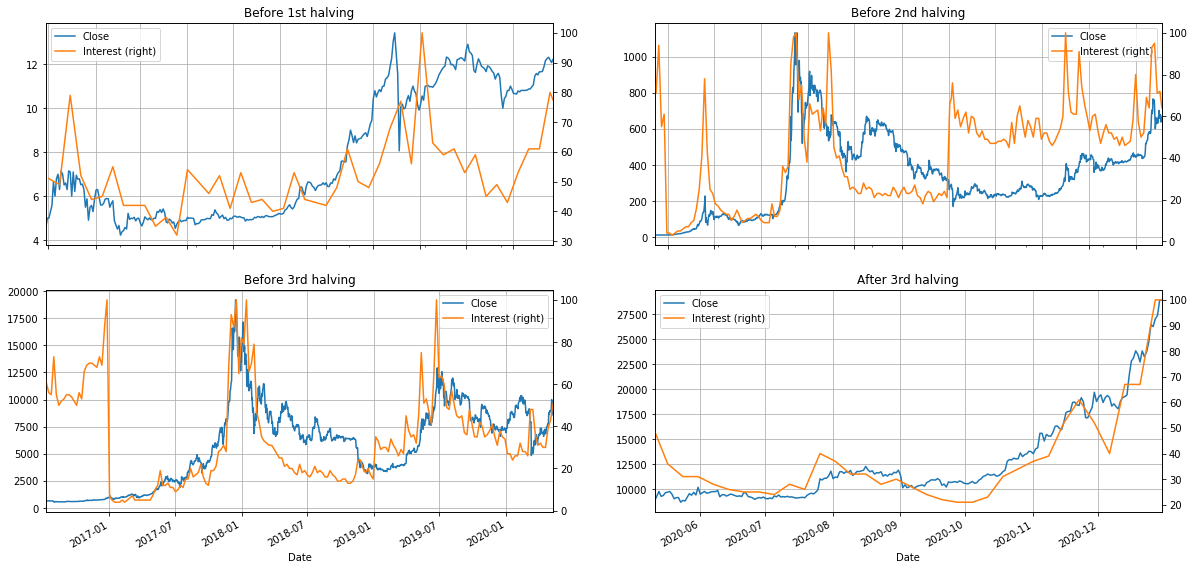

In [25]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

mask = df.index < pd.datetime(year=2012, month=11, day=28)
df.loc[mask, ['Close','Interest']].plot(kind='line', secondary_y='Interest',  ax=ax[0][0])

mask = ((df.index >= pd.datetime(year=2012, month=11, day=28)) & (df.index < pd.datetime(year=2016, month=7, day=9)))
df.loc[mask, ['Close','Interest']].plot(kind='line', secondary_y='Interest',  ax=ax[0][1])

mask = ((df.index >= pd.datetime(year=2016, month=7, day=9)) & (df.index < pd.datetime(year=2020, month=5, day=11)))
df.loc[mask, ['Close','Interest']].plot(kind='line', secondary_y='Interest',  ax=ax[1][0])

mask = (df.index >= pd.datetime(year=2020, month=5, day=11))
df.loc[mask, ['Close','Interest']].plot(kind='line', secondary_y='Interest',  ax=ax[1][1])

ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()

ax[0][0].set_title('Before 1st halving')
ax[0][1].set_title('Before 2nd halving')
ax[1][0].set_title('Before 3rd halving')
ax[1][1].set_title('After 3rd halving')

ax[0][0].set_xlabel('Timestamp')
ax[0][1].set_xlabel('Timestamp')
ax[1][0].set_xlabel('Timestamp')
ax[1][1].set_xlabel('Timestamp')

plt.show()

# Alternative me

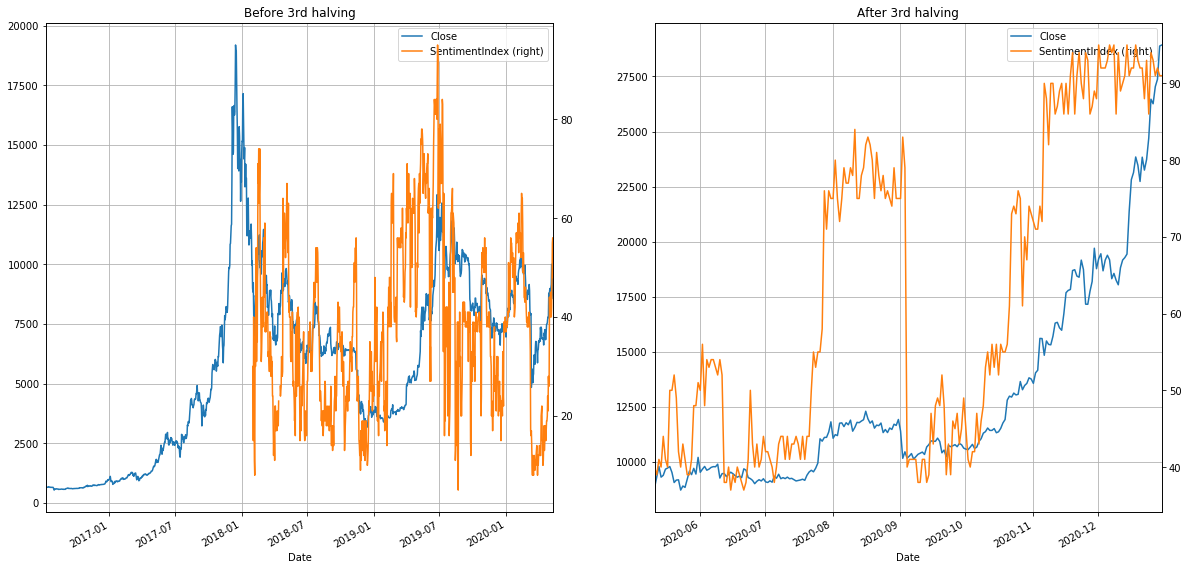

In [28]:
# Ploteamos la series.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

mask = ((df.index >= pd.datetime(year=2016, month=7, day=9)) & (df.index < pd.datetime(year=2020, month=5, day=11)))
df.loc[mask, ['Close','SentimentIndex']].plot(kind='line', secondary_y='SentimentIndex',  ax=ax[0])

mask = (df.index >= pd.datetime(year=2020, month=5, day=11))
df.loc[mask, ['Close','SentimentIndex']].plot(kind='line', secondary_y='SentimentIndex',  ax=ax[1])

ax[0].grid()
ax[1].grid()

ax[0].set_title('Before 3rd halving')
ax[1].set_title('After 3rd halving')

ax[0].set_xlabel('Timestamp')
ax[1].set_xlabel('Timestamp')

plt.show()

In [30]:
df['CloseFFD'].corr(df['Interest'])

0.08429268146105631

In [31]:
df['CloseFFD'].corr(df['SentimentIndex'])

0.6841637502996722